<a href="https://colab.research.google.com/github/nathon-tadeo/Intro-to-ML/blob/main/homework_1_intro_to_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D3 = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'
df = pd.read_csv(D3)

# Explanatory Variables
x1 = df.values[:,0]
x2 = df.values[:,1]
x3 = df.values[:,2]

# Dependent Variables
y  = df.values[:,3]
m = len(y) # Number of training example

In [ ]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [ ]:
#Problem 1
# Plotting function
def plot_regression(X, y, theta, cost_history, variable_name):
    # Scatter plot for the training data
    plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')
    plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')
    plt.grid(True)
    plt.xlabel(variable_name)
    plt.ylabel('Y')
    plt.title(f'Linear Regression Fit ({variable_name})')
    plt.legend()
    plt.show()

  # Plot the cost history
    plt.plot(range(1, len(cost_history) + 1), cost_history, color='blue')
    plt.grid(True)
    plt.xlabel('# of Iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Convergence of Gradient Descent ({variable_name})')
    plt.show()


Final model for x1: Y = 5.927948595755642 + -2.0383365082076943 * x1


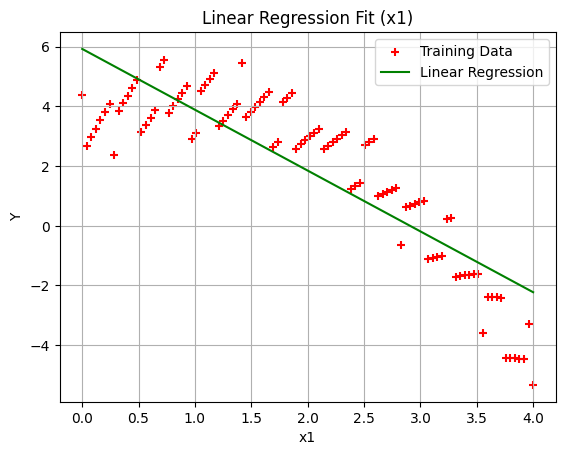

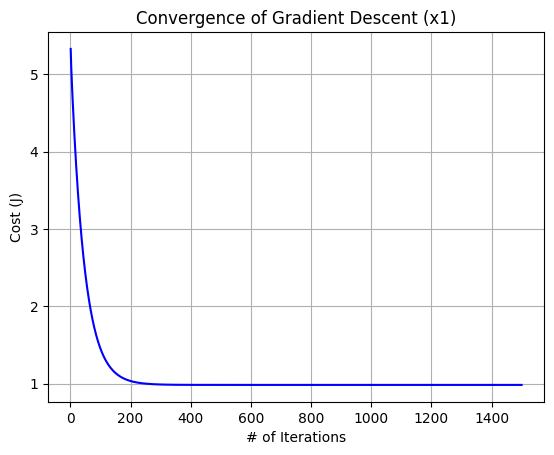

Final model for x2: Y = 0.7360604051895187 + 0.557607620025968 * x2


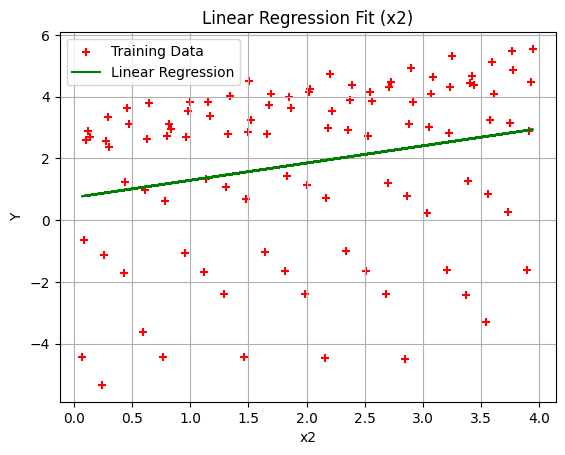

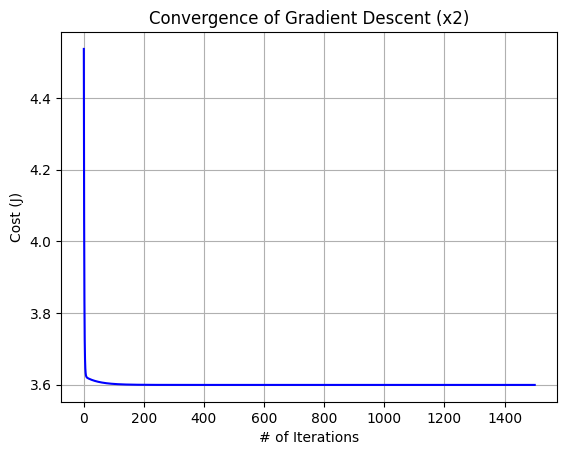

Final model for x3: Y = 2.8714219890778536 + -0.520482838853714 * x3


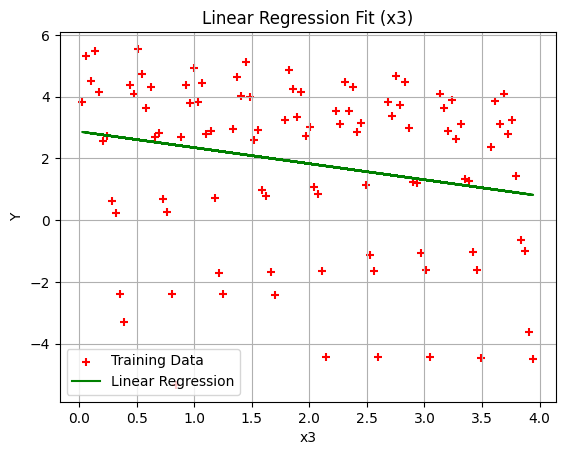

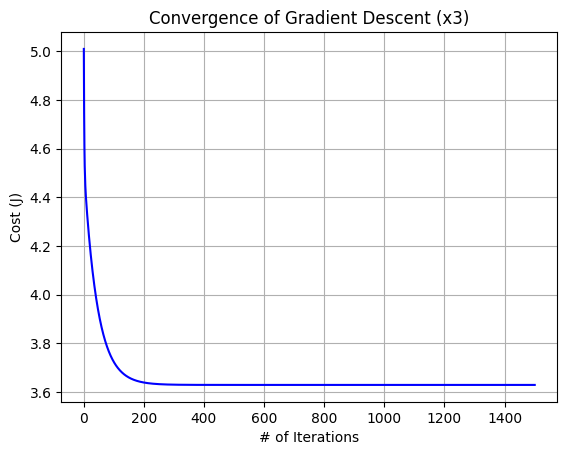

In [ ]:
# Loop for each explanatory variable
variables = {'x1': x1, 'x2': x2, 'x3': x3}
alpha = 0.05 #Learning rate
iterations = 1500

for var_name, X_var in variables.items():
    # Bias term
    X_0 = np.ones((m, 1))

    # Reshaping variable for 2D array
    X_1 = X_var.reshape(m, 1)

    #Stack all variables horizontally
    X = np.hstack((X_0, X_1))

    # Initialize theta to zeros (2 parameters)
    theta = np.zeros(2)

    # Run gradient descent
    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

    # Print the final model
    print(f"Final model for {var_name}: Y = {theta[0]} + {theta[1]} * {var_name}")

    # Plot results
    plot_regression(X, y, theta, cost_history, var_name)

Final model: Y = 4.151187282528127 + -1.839429097710375*x1 + 0.7247385609338923*x2 + -0.0951326640871153*x3


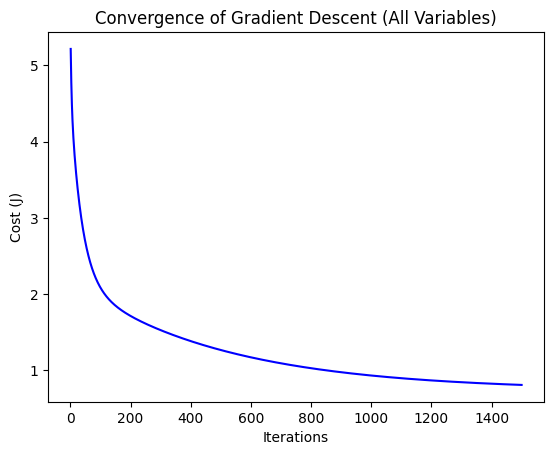

Predictions for new inputs: [ 2.94136408  0.09179843 -0.01275555]


In [ ]:
# Problem 2

# Bias Term
X_0 = np.ones((m, 1))

# Reshaping variable
X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)

#Stack all variables horizontally
X = np.column_stack((X_0, X_1, X_2, X_3))

alpha = 0.01 #Learning Rate

# Initialize theta to zeros (4 parameters)
theta = np.zeros(4)

# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Final Model
print(f"Final model: Y = {theta[0]} + {theta[1]}*x1 + {theta[2]}*x2 + {theta[3]}*x3")

# Plot the loss over iterations
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent (All Variables)')
plt.show()

# Predict values for new inputs
new_data = np.array([[1, 1, 1, 1], [1, 2, 0, 4], [1, 3, 2, 1]])
predictions = new_data.dot(theta)
print("Predictions for new inputs:", predictions)
